## Three Basic Steps

    1. Split the data into features and labels
    2. Filling or discarding missing values
    3. Converting Non-Numerical Values to Numerical Values

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [354]:
df = pd.read_csv('heart-disease.csv')

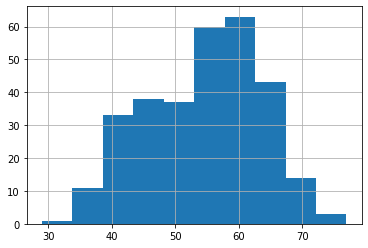

In [355]:
df.age.hist()

In [356]:
X = df.drop("target",axis=1)

In [357]:
y = df.target

In [358]:
# Split the data into train and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [359]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure its all numerical

In [360]:
car_sales = pd.read_csv('final_car_sales.csv')

In [361]:
car_sales = car_sales.drop(columns=car_sales.columns[0],axis=1)

In [362]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
897,BMW,Blue,163322.0,3.0,31666.0
898,Toyota,Black,35820.0,4.0,32042.0
899,Nissan,Blue,66604.0,4.0,31570.0
900,Honda,White,215883.0,4.0,4001.0


In [363]:
X = car_sales.drop("Price",axis=1)
y = car_sales.Price
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in X.columns:
    if X[col].dtype == object:
        X[col] = le.fit_transform(X[col])


In [364]:
### Practice one hot encoder!!

'''
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catagorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,catagorical_features)],remainder="passthrough")
transformed_X = transformer.fit_transform(X)
'''

'\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\n\ncatagorical_features = ["Make","Colour","Doors"]\none_hot = OneHotEncoder()\ntransformer = ColumnTransformer([("one_hot",one_hot,catagorical_features)],remainder="passthrough")\ntransformed_X = transformer.fit_transform(X)\n'

In [365]:
# Split the data into train and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20)

In [366]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [367]:
y_pred = np.array(rfr.predict(X_test))

arr = np.vstack((y_pred,y_test)).transpose()
final = pd.DataFrame(arr,columns=["Prediction","Actual"])
rfr.score(X_test,y_test)

0.28608466131165344

In [368]:
indexes = np.arange(0,len(arr))

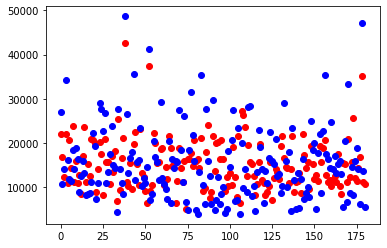

In [369]:
plt.plot(indexes,y_pred,'ro')
plt.plot(indexes,y_test,'bo')